<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
# autoreload updated and newly installed packages
# without having to restart Jupyter kernel
%load_ext autoreload
%autoreload 2
# Some little interaction with matplotlib
%matplotlib inline
# Avoid using Jedi for faster autocomplete (tab)
%config Completer.use_jedi = False

## Crack growth analysis

### Hollow cylinder with crack on the external surface 

In [2]:
# Standard imports
import ast
import datetime
import platform
import os
import sys
from typing import List
# Non-standard imports
from pathlib import Path
from scipy import stats
from tqdm import tqdm
import matplotlib
import matplotlib.pyplot as plt
import numba as nb
import numpy as np
import pandas as pd
import plotly.graph_objs as go
# py-fatigue import
import py_fatigue as pf
import py_fatigue.testing as test
# Paths of this tutorial and of the data
TUTORIAL_PATH = os.path.dirname(os.getcwd())
DATA_PATH = os.path.join(Path.home(), "Documents", "Work", "data")
if not TUTORIAL_PATH in sys.path:
    sys.path.append(TUTORIAL_PATH)
np.set_printoptions(threshold=sys.maxsize)

In [3]:
print(f"Platform: {platform.platform()}")
print(f"Python version: {sys.version}")
print(f"py-fatigue version: {pf.styling.TermColors.CBOLD}{pf.__version__}")

print(f"{pf.styling.TermColors.CWHITEBG}\
{pf.styling.TermColors.CBOLD}\
{pf.styling.TermColors.CBLUE}")
      
print(f"DATA_PATH = {DATA_PATH}")
print(f"TUTORIAL_PATH = {TUTORIAL_PATH}")

print(f"{pf.styling.TermColors.CEND}")

Platform: Linux-5.19.0-26-generic-x86_64-with-glibc2.35
Python version: 3.8.14 (default, Dec  5 2022, 15:48:21) 
[GCC 12.2.0]
py-fatigue version: 1.0.5

DATA_PATH = /home/pd/Documents/Work/data
TUTORIAL_PATH = /home/pd/Python/Packages/Github/py-fatigue



In [4]:
plt.rcParams["figure.figsize"] = (7, 3.5)
plt.rcParams["font.family"] = ["Sans-Serif"]
plt.rcParams["font.size"] = 10
plt.rcParams["lines.markersize"] = 3
plt.rcParams["axes.grid"] = True
plt.rcParams["grid.color"] = "#DDDDDD"
plt.rcParams["grid.linestyle"] = "-"
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False
plt.rcParams["xtick.bottom"] = False
plt.rcParams["xtick.labelbottom"] = True
plt.rcParams["ytick.left"] = False
plt.rcParams["ytick.labelleft"] = True

In [5]:
# 1
print(f"\33[36m1. Read \33[1m.csv\33[22m file\33[0m")
df_ = pd.read_csv(os.path.join(DATA_PATH, "year-2018-shm-data.csv"))
# 2
print(f"\33[36m2. Set \33[1m'timestamp'\33[22m as index\33[0m")
df_ = df_.set_index("timestamp")
df_.index = pd.to_datetime(df_.index)
df_ = df_.drop(columns=["location"])
# 3
for col in df_.columns:
    if col.startswith("CC_"):
        tqdm.pandas(desc=f"\33[36m3. Converting \33[1m{col[:3]}{col[-3:]}\33[0m") 
        df_[col] = df_[col].progress_apply(
            lambda x: ast.literal_eval(x) if not x!=x else x
        )
# 4
tqdm.pandas(desc=f"\33[36m4. From \33[1mdict \33[22mto \33[1mdwf.CycleCount\33[0m")

1. Read .csv file
2. Set 'timestamp' as index


3. Converting CC_Mtn: 100%|█████████████| 52604/52604 [00:07<00:00, 6752.40it/s]


In [6]:
cc = pf.CycleCount.from_rainflow(df_.CC_BB_C01_TP_SG_LAT019_Mtl[0])

In [7]:
cc.count_cycle

array([25. , 12. ,  7. ,  3. ,  3. ,  3. ,  1. ,  1. ,  2. ,  2. ,  4. ,
        3. ,  1. ,  3. ,  2. ,  4. ,  1. ,  1. ,  1. ,  2. ,  2. ,  5. ,
        4. ,  1. ,  4. ,  1. ,  4. ,  2. ,  3. ,  6. ,  1. ,  3. ,  2. ,
        2. ,  3. ,  1. ,  4. ,  1. ,  2. ,  3. ,  1. ,  4. ,  2. ,  5. ,
        2. ,  1. ,  5. ,  1. ,  1. ,  6. ,  1. ,  1. ,  2. ,  3. ,  1. ,
        4. ,  2. ,  2. ,  2. ,  7. ,  2. ,  3. ,  3. ,  1. ,  1. ,  3. ,
        4. ,  1. ,  2. ,  2. ,  3. ,  2. ,  1. ,  4. ,  1. ,  2. ,  1. ,
        1. ,  2. ,  3. ,  1. ,  1. ,  2. ,  1. ,  1. ,  2. ,  2. ,  1. ,
        1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,
        1. ,  1. ,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
        0.5,  0.5,  0.5,  0.5,  0.5])

In [14]:
np.hstack([cc.half_cycles[:, 1], cc.full_cycles[:, 1]])

array([2.5762, 3.6844, 6.1776, 6.6172, 6.8213, 7.4237, 7.621 , 9.5257,
       7.784 , 7.1784, 6.4586, 5.8815, 5.0147, 4.949 , 0.225 , 0.225 ,
       0.225 , 0.225 , 0.225 , 0.225 , 0.225 , 0.225 , 0.225 , 0.225 ,
       0.225 , 0.225 , 0.225 , 0.225 , 0.225 , 0.225 , 0.225 , 0.225 ,
       0.225 , 0.225 , 0.225 , 0.225 , 0.225 , 0.225 , 0.225 , 0.275 ,
       0.275 , 0.275 , 0.275 , 0.275 , 0.275 , 0.275 , 0.275 , 0.275 ,
       0.275 , 0.275 , 0.275 , 0.325 , 0.325 , 0.325 , 0.325 , 0.325 ,
       0.325 , 0.325 , 0.375 , 0.375 , 0.375 , 0.425 , 0.425 , 0.425 ,
       0.525 , 0.525 , 0.525 , 0.625 , 0.675 , 0.725 , 0.725 , 0.775 ,
       0.775 , 0.825 , 0.825 , 0.825 , 0.825 , 0.875 , 0.875 , 0.875 ,
       0.925 , 1.025 , 1.025 , 1.025 , 1.075 , 1.075 , 1.175 , 1.175 ,
       1.175 , 1.175 , 1.225 , 1.275 , 1.325 , 1.375 , 1.375 , 1.425 ,
       1.425 , 1.475 , 1.475 , 1.475 , 1.475 , 1.475 , 1.525 , 1.525 ,
       1.525 , 1.525 , 1.575 , 1.625 , 1.625 , 1.625 , 1.625 , 1.675 ,
      

In [48]:
cc.mean_stress

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
ae, loce, scalee = stats.fatiguelife.fit(cc.count_cycle)

In [ ]:
xmin

In [ ]:
plt.figure()
plt.hist(cc.count_cycle, bins=30, density=True, alpha=0.6, color='g')
xmin, xmax = plt.xlim()
x = np.linspace(0.6, xmax, 1000)
p = stats.fatiguelife.pdf(x, ae, loce, scalee)
plt.plot(x, p, 'k', linewidth=2)


In [ ]:
ae

In [ ]:
mean, var, skew, kurt = stats.skewnorm.stats(ae, moments='mvsk')

In [ ]:
skew

In [ ]:
mean

In [ ]:
var

In [29]:
from typing import Any, Optional, Sequence, Union
import matplotlib as mpl
import warnings
from __future__ import annotations

In [45]:
# Create models from data
def best_fit_distribution(
    data: Union[Sequence[Any], np.ndarray, pd.Series],
    bins: int = 200,
    _distn_names: tuple = (
        "fatiguelife",
        "weibull_min",
        "exponweib",
        "exponpow",
        "norm",
        "powerlaw",
        "skewnorm",
    ),
    ax: Optional[mpl.axes.Axes] = None,
) -> list[tuple]:
    """Model data by finding best fit distribution to data

    Parameters
    ----------
    data : array-like
        Data to be fitted.
    bins : int, optional
        Number of bins to be used for the cumulative histogram, by default 200
    _distn_names : tuple, optional
        Tuple of distributions to check, by default
        ["fatiguelife", "weibull_min", "exponweib", "exponpow", "norm",
         "powerlaw"]
    ax : matplotlib.axes.Axes, optional

    Returns
    -------
    list[tuple]
        List of best fit distributions and their parameters
    """
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Best holders
    # if best_fit_distribution is None:
    best_distributions = []

    # Estimate distribution parameters from data
    for distribution in tqdm(_distn_names):
#         print(distribution)
        distribution = getattr(stats, distribution)
        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings("ignore")
                # fit dist to data
                params = distribution.fit(data)
                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]
                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))
                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax, label=distribution.name)
                        ax.legend()
                except Exception:  # pylint: disable=broad-except
                    pass
                # identify if this distribution is better
                best_distributions.append((distribution, params, sse))
        except Exception as e:  # pylint: disable=broad-except
#             pritn(e)
            pass
    return sorted(best_distributions, key=lambda x: x[2])

100%|█████████████████████████████████████████████| 7/7 [00:00<00:00, 12.73it/s]


[(<scipy.stats._continuous_distns.weibull_min_gen at 0x7f82db0524c0>,
  (0.4588434789870345, 0.22499999999999998, 2.623292251776734),
  3.143005828172729),
 (<scipy.stats._continuous_distns.powerlaw_gen at 0x7f82db03b310>,
  (0.518261043742964, 0.22499999999999998, 9.763142372970805),
  3.6369955278731307),
 (<scipy.stats._continuous_distns.exponpow_gen at 0x7f82db4697c0>,
  (0.2421142957892638, 0.22499999999999998, 4.593502461963604),
  3.9128078324369024),
 (<scipy.stats._continuous_distns.exponweib_gen at 0x7f82db469550>,
  (0.14954787446159876,
   1.4374425633799242,
   0.22499999999999998,
   3.549730842858807),
  4.996415330296996),
 (<scipy.stats._continuous_distns.skew_norm_gen at 0x7f82db04c0a0>,
  (41161584.494687185, 0.22499956376702213, 3.0869903399898373),
  5.76268088977205),
 (<scipy.stats._continuous_distns.fatiguelife_gen at 0x7f82db469af0>,
  (0.651363987368919, -0.774234823401462, 2.819710704190818),
  6.317287123788892),
 (<scipy.stats._continuous_distns.norm_gen at

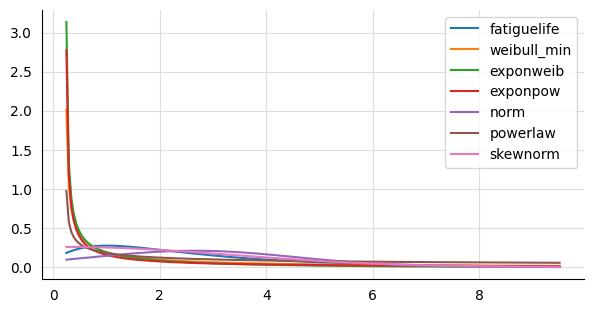

In [46]:
best_fit_distribution(
    np.hstack([cc.half_cycles[:, 1], cc.full_cycles[:, 1]]),
    ax=ax
#     _distn_names=tuple(stats._continuous_distns._distn_names)
)

In [40]:
ax.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [70]:
mean, cov, skew = cc.statistical_moments

In [71]:
mean, cov, skew

(2.6496130597014926, 0.7210628185804286, 0.21568496332023693)

In [72]:
from typing import Sized, Iterable


In [74]:
vector = np.linspace(0, 50)

In [75]:
isinstance(vector, Sized)

True

In [77]:
isinstance(vector, Iterable)

True